In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('./data/pulsar_stars.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [31]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [32]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [33]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [34]:
df_corr = df.corr()

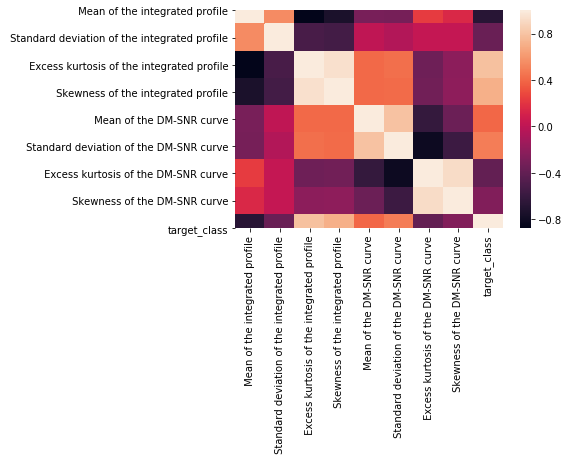

In [7]:
sb.heatmap(data=df_corr)

In [14]:

a = [5,4,3,2,1]
b = 1

def gap(a,b):
    return a-b

df = pd.DataFrame(data=a, columns =[1])
res = df[1].apply(gap , args=(b,)) 
print(res)

0    4
1    3
2    2
3    1
4    0
Name: 1, dtype: int64


In [39]:
df[1].values

array([5, 4, 3, 2, 1])

In [155]:
def residue(x, y):
    return x - y

def sumOfSquares(series):
    m = np.mean(series)
    loc_data = series.apply(residue, args=(m,))
    loc_data = loc_data.apply(lambda x: x*x)
    return loc_data.sum()

def Sxy(series1, series2):
    x_bar = np.mean(series1)
    y_bar = np.mean(series2)
    sumX = series1.apply(residue, args=(x_bar,))
    sumY = series2.apply(residue, args=(y_bar,))
    result = sumX.multiply(sumY)
    return result.sum()
    

def linearRegression(x, y):
    slope = Sxy(x,y)/sumOfSquares(x)
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    intercept = y_bar - (slope*x_bar)
    print("Slope is:  {}   Intercept is {}".format(slope, intercept))

    


In [158]:
from sklearn.linear_model import LinearRegression

cust_names = {' Mean of the integrated profile': 'Mean_IP', 
             ' Standard deviation of the integrated profile': 'Sd_IP',
             ' Excess kurtosis of the integrated profile':'kurt_IP',
             ' Skewness of the integrated profile':'skwe_IP'}
df.rename(columns=cust_names, inplace=True)

X = df[['Mean_IP']]
y = df[['kurt_IP']]

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [160]:
model.coef_

array([[-0.0362478]])

In [161]:
model.intercept_

array([4.50426224])

In [162]:
linearRegression(df['Mean_IP'], df['kurt_IP'])

Slope is:  -0.0362478045891814   Intercept is 4.504262244441273


In [148]:
years = list(range(1950,2011,5))
print(years)

[1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010]


In [149]:
pop = [2558, 2782, 3043, 3350, 3712, 4089, 4451, 4855, 5287, 5700, 6090, 6474, 6864]
print(np.mean(pop))

4558.076923076923


In [157]:
X = pd.Series(years)
y = pd.Series(pop)

print(sumOfSquares(X))
print(Sxy(X,y))
linearRegression(X, y)

4550.0
337250.0
Slope is:  74.12087912087912   Intercept is -142201.26373626373
